## Riksantikvarieämbetet RAÄ - kulturarvsdata
get UGC data [see API](http://ugc.kulturarvsdata.se/UGC-hub/api/documentation)
and understand how they link Europeana etc...

In [178]:
# from pandas.io.json import json_normalize
import urllib3, json
import pandas as pd 
http = urllib3.PoolManager()
urlbase = "http://ugc.kulturarvsdata.se/UGC-hub/api?method=retrieve&scope=all&maxCount=40000&objectUri=all&format=json&selectFrom="
pd.set_option("display.max.columns", None) 
dftot = pd.DataFrame()
for i in range(1,3000000,200):
    url = urlbase + str(i)
    if ((i-1) % 1000) == 0:
       print('*', end='', flush=True)
    r = http.request('GET', url)
    data = json.loads(r.data)
    dftot = dftot.append(pd.DataFrame(data["response"]["relations"]))
print(dftot.head())
print(dftot.userName.unique())


****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

KeyError: 'relations'

In [179]:
print(dftot.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2587929 entries, 0 to 128
Data columns (total 12 columns):
applicationName    object
comment            object
coordinateValue    object
createDate         object
id                 int64
imageUrl           object
objectUri          object
relatedUri         object
relationType       object
tag                object
updateDate         object
userName           object
dtypes: int64(1), object(11)
memory usage: 256.7+ MB
None


In [180]:
print(dftot.applicationName.unique())

['Kringla' 'Albin Larsson 1' 'Marcus Smith 1' 'Svensk runbibliografi']


In [181]:
dftot.relationType.unique()

array(['isVisualizedBy', 'sameAsWikipedia', 'sameAs', 'describes',
       'visualizes', 'isDescribedBy', 'isDescribedByWikipedia', 'hasPart',
       'isRelatedTo', 'isPartOf', nan, 'has_created'], dtype=object)

In [182]:
dftot["relationType"].value_counts()

sameAs                    2204256
isRelatedTo                216265
isVisualizedBy             135426
isDescribedBy               13465
sameAsWikipedia             12015
visualizes                   6125
isDescribedByWikipedia        193
hasPart                        98
isPartOf                       81
describes                       2
has_created                     1
Name: relationType, dtype: int64

In [183]:
dftot.head()

,applicationName,comment,coordinateValue,createDate,id,imageUrl,objectUri,relatedUri,relationType,tag,updateDate,userName
0,Kringla,NaN,NaN,2020-06-17,34865339,NaN,http://kulturarvsdata.se/arme/object/AM140132,http://commons.wikimedia.org/wiki/File:Pansarv...,isVisualizedBy,NaN,NaN,WikimediaC
1,Kringla,NaN,NaN,2020-06-17,34865338,NaN,http://kulturarvsdata.se/arme/object/AM140132,http://commons.wikimedia.org/wiki/File:Pansarv...,isVisualizedBy,NaN,NaN,WikimediaC
2,Kringla,NaN,NaN,2020-06-17,34865337,NaN,http://kulturarvsdata.se/arme/object/AM140132,http://commons.wikimedia.org/wiki/File:Pansarv...,isVisualizedBy,NaN,NaN,WikimediaC
3,Kringla,NaN,NaN,2020-06-17,34865336,NaN,http://kulturarvsdata.se/arme/object/AM140139,http://commons.wikimedia.org/wiki/File:Bandvag...,isVisualizedBy,NaN,NaN,WikimediaC
4,Kringla,NaN,NaN,2020-06-17,34865335,NaN,http://kulturarvsdata.se/arme/object/AM140139,http://commons.wikimedia.org/wiki/File:Bandvag...,isVisualizedBy,NaN,NaN,WikimediaC


In [184]:
dftot.tail()

,applicationName,comment,coordinateValue,createDate,id,imageUrl,objectUri,relatedUri,relationType,tag,updateDate,userName
124,Kringla,NaN,NaN,2012-02-07,646,NaN,http://kulturarvsdata.se/raa/lamning/bb3319c0-...,http://kulturarvsdata.se/raa/kmb/16000300023226,isVisualizedBy,NaN,NaN,Johan
125,Kringla,NaN,NaN,2012-02-03,645,NaN,http://kulturarvsdata.se/SMVK-VKM/fotografi/12...,http://kulturarvsdata.se/SMVK-EM/objekt/1357297,visualizes,NaN,NaN,Mjohansson2
126,Kringla,NaN,NaN,2012-02-03,644,NaN,http://kulturarvsdata.se/SMVK-EM/objekt/1023638,http://kulturarvsdata.se/SMVK-VKM/fotografi/11...,isVisualizedBy,NaN,NaN,Mjohansson2
127,Kringla,NaN,NaN,2012-02-02,643,NaN,http://kulturarvsdata.se/raa/bbr/21400000444096,http://kulturarvsdata.se/raa/kmb/16001000227184,isVisualizedBy,NaN,NaN,Johan
128,Kringla,NaN,NaN,2012-02-02,642,NaN,http://kulturarvsdata.se/raa/lamning/bb3319c0-...,http://kulturarvsdata.se/raa/kmb/16001000064228,isVisualizedBy,NaN,NaN,Johan


## Listar unika användare som bidragit


In [186]:
print(dftot.userName.unique())

['WikimediaC' 'Wikipedia' 'Albin Larsson' 'carwash' 'Nixdorf' 'Boberger'
 'Holger.Ellgaard' 'salgo60' 'DavidH' 'Bernt Fransson' 'kallep' 'Larissa'
 'Lasse Lundqvist' 'HLP' 'babben' 'Allivet' 'demithor' 'Allvet'
 'Jan Ainali' 'Anders Lindeberg-Lindvet' 'Magnus Sälgö' 'andersthe'
 'Little Gun' 'kringelkrok' 'Magnus Johansson' 'Lennart T Olsson'
 'tompahvall' 'Tore Danielsson' 'hamrelius' 'Julie' 'Johan' 'nilsw'
 'David Haskiya' 'filosofiedoktor' 'kalle' 'Adlitam' 'Eva Vedin'
 'Hammarkind' 'Work with Sounds' 'jssfrk' 'blajo' 'Dan Albert Koehl'
 'Wilhelm Lagercrantz' 'Tester Testersson' 'Sendelbach' 'Johan Carlström'
 'Anders Wennersten' 'Örjan Mattsson' 'carin' 'Anders Olsson'
 'paulinadevries' 'anna söderström' 'Kalle Johansson' 'Sophie' 'henning'
 'helenabjork' 'Kaysara' 'ekstahagar' 'Åsa Johansson' 'magnussonp'
 'Kicki Ericson' 'LA2' 'Nils Weinander' 'Lotta' 'Per Rohdin'
 'Henrik Summanen' 'Jomal' 'Mikael Lindmark' 'LittleGun99' 'Mjohansson2']


In [234]:
usersActivity = dftot["userName"].value_counts() 
for i,v in dftot["userName"].value_counts().items():
    print(i,"\t",v)

Albin Larsson 	 2420261
WikimediaC 	 134251
carwash 	 20152
Wikipedia 	 11028
Jomal 	 604
Adlitam 	 338
Lasse Lundqvist 	 232
Bernt Fransson 	 196
Larissa 	 159
Magnus Johansson 	 100
Johan 	 93
Holger.Ellgaard 	 82
Eva Vedin 	 50
Allvet 	 40
blajo 	 30
jssfrk 	 27
Örjan Mattsson 	 24
DavidH 	 23
Jan Ainali 	 22
Henrik Summanen 	 18
David Haskiya 	 18
Åsa Johansson 	 16
tompahvall 	 15
Kicki Ericson 	 15
salgo60 	 11
nilsw 	 9
HLP 	 9
Nixdorf 	 9
Allivet 	 8
Anders Lindeberg-Lindvet 	 6
Mikael Lindmark 	 5
andersthe 	 5
Magnus Sälgö 	 5
paulinadevries 	 5
Tore Danielsson 	 4
Dan Albert Koehl 	 4
Little Gun 	 3
kalle 	 3
Sendelbach 	 3
carin 	 3
LA2 	 2
Johan Carlström 	 2
Wilhelm Lagercrantz 	 2
babben 	 2
hamrelius 	 2
Hammarkind 	 2
Work with Sounds 	 2
helenabjork 	 2
Julie 	 2
Sophie 	 2
kringelkrok 	 2
kallep 	 2
Mjohansson2 	 2
Kalle Johansson 	 1
anna söderström 	 1
Nils Weinander 	 1
LittleGun99 	 1
demithor 	 1
Anders Wennersten 	 1
henning 	 1
magnussonp 	 1
Tester Testersson

In [235]:
percentage = dftot["userName"].value_counts(normalize=True) 


In [236]:
percentage[:5]

Albin Larsson    0.935212
WikimediaC       0.051876
carwash          0.007787
Wikipedia        0.004261
Jomal            0.000233
Name: userName, dtype: float64

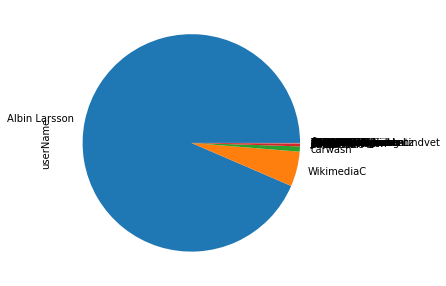

In [209]:
plot = percentage.plot.pie(y='counts', figsize=(5, 5))

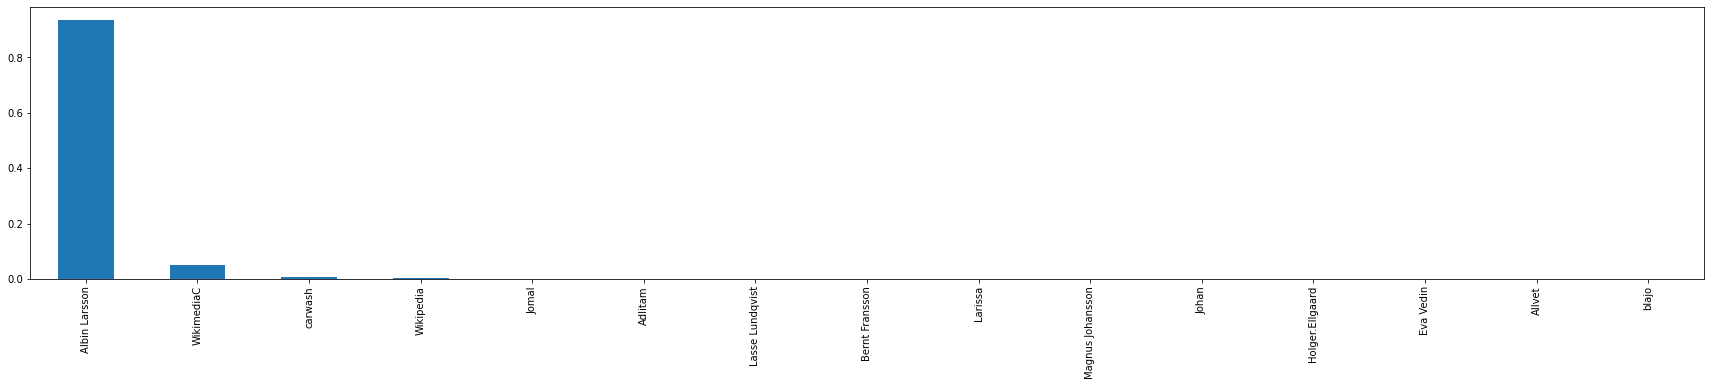

In [255]:
plot2 = percentage[:15].plot.bar(y='counts', figsize=(30, 5))

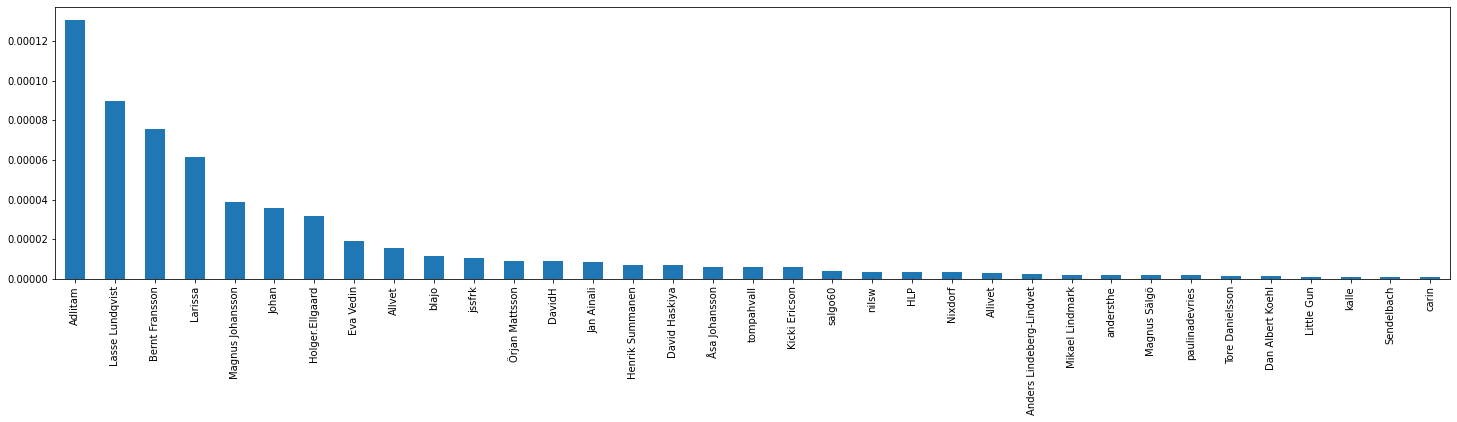

In [252]:
plot2 = percentage[5:40].plot.bar(y='counts', figsize=(25, 5))

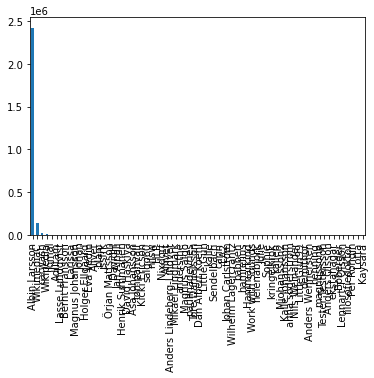

In [190]:
%matplotlib inline  
import matplotlib.pyplot as plt 
users = dftot["userName"].value_counts()

users.plot( kind = 'bar') 
plt.show()

In [191]:
dftot["createDate"].value_counts()

2018-11-28    1000004
2018-12-03     955563
2019-08-05     216202
2018-10-06     156895
2020-06-17     145279
               ...   
2019-12-10          1
2014-11-20          1
2013-12-20          1
2014-04-30          1
2014-07-29          1
Name: createDate, Length: 502, dtype: int64

Plot piechart user

check links Europeana and if we have Linkeddata to agents ....

In [274]:
europeana = dftot['relatedUri'].str.contains("data.europeana.eu") 
europeana.describe()

count     2587927
unique          2
top          True
freq      1966045
Name: relatedUri, dtype: object

## Koll om det finns kopplingar länkad data dvs agent  
1966045 kopplingar verkar vara mellan objekt i kulturarvsdata till data.europeana.eu/item/  
Koppling Länkad data hittad dvs. samma som [Europeana Entity](https://www.wikidata.org/wiki/Property:P7704) samma som [Europeana Entity API](https://pro.europeana.eu/page/entity) verkar vara 167 stycken jmf Wikidata Europeana Entity > [160 000](https://www.wikidata.org/wiki/Property:P7704)

In [291]:
europeanaagent = dftot['relatedUri'].str.contains("agent","data.europeana.eu") 
europeanaagent2 = europeanaagent[europeanaagent == True] 
europeanaagent2.describe()

count       46
unique       1
top       True
freq        46
Name: relatedUri, dtype: object